In [1]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.8)

In [2]:
# Load the data
pd.options.display.max_rows = 1000

data = pd.read_csv(r'card_transdata_preprocessed.csv')
# data.head() # show only first rows

display(data)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1,1,0,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1,0
999998,4.258729,0.242023,0.475822,1,0,0,1,0


In [3]:
data.describe() # -> no null values (as we saw in ETL)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


# Checklist:
    - create new variables
    - drop irrelevant variables
    - fill nulls (mean, median, 0, depending on the data)
    - deal with categorical - possibly create dummy variables
    - normalize/standardize variables
    - balance the data set (by the dependant variable)
    - check for correlation (possibly drop variables)

In [4]:
# new variables: ??? don't need them
# ----------------------------------------------------------
# drop useless columns -> we don't have id columns or columns with too detailed values 
# -> each column of our dataset is usefull to predict the class "fraud"
# ----------------------------------------------------------
# null values: we don't have null values to deal with. 
data.isnull().sum(axis = 0)
# ----------------------------------------------------------
# deal with categorical: dummy variables -> we don't have categorical features: binary feature don't need to apply method 
# get_dummies -> we would obatin two features for each binary feature (ex. used chip and not used chip) extremly related and we should drop one of them 
# -> it's useless this phase for our data

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [5]:
# Data Normalization
# we should put feature values between 0 and 1 to have best results in classification algorithms

scaler = MinMaxScaler()
scaled_d = scaler.fit_transform(data[["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]])
data[["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]] = scaled_d
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.005443,0.000026,0.007250,1,1,0,0,0
1,0.001018,0.000015,0.004816,1,0,0,0,0
2,0.000478,0.000068,0.001581,1,0,0,1,0
3,0.000211,0.000473,0.001338,1,1,0,1,0
4,0.004156,0.000048,0.008284,1,1,0,1,0


FRAUD:  87403  NOT FRAUD:  912597


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.001153,0.017954,0.000951,1,0,0,1,1
1,0.000594,0.000066,0.035166,1,1,0,1,1
2,0.006026,0.000010,0.015145,1,0,0,1,1
3,0.004789,0.000011,0.000739,1,0,1,0,0
4,0.009579,0.000041,0.001107,1,1,0,0,0
...,...,...,...,...,...,...,...,...
1995,0.000594,0.000009,0.005476,1,0,0,0,0
1996,0.009674,0.000318,0.009142,1,0,0,1,1
1997,0.002401,0.000003,0.000888,1,1,0,1,0
1998,0.005466,0.004888,0.014515,1,0,0,1,1


FRAUD:  1000  NOT FRAUD:  1000


[Text(0, 0, '1000'), Text(0, 0, '1000')]

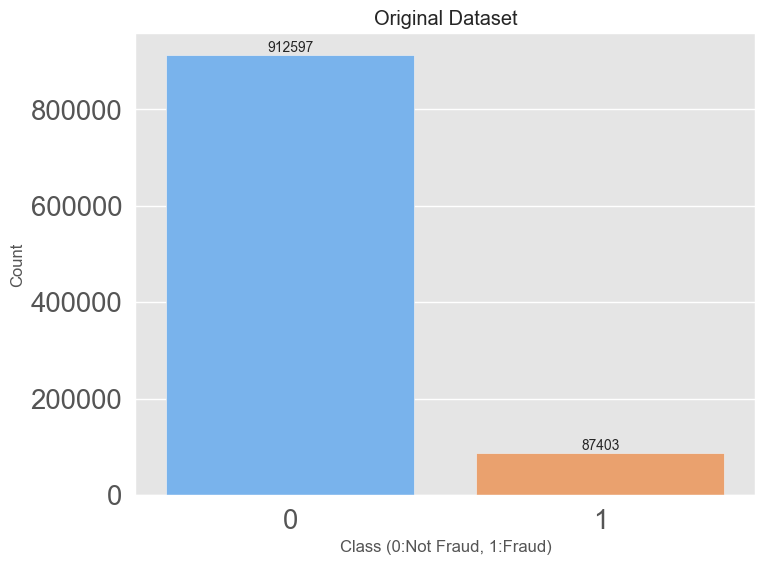

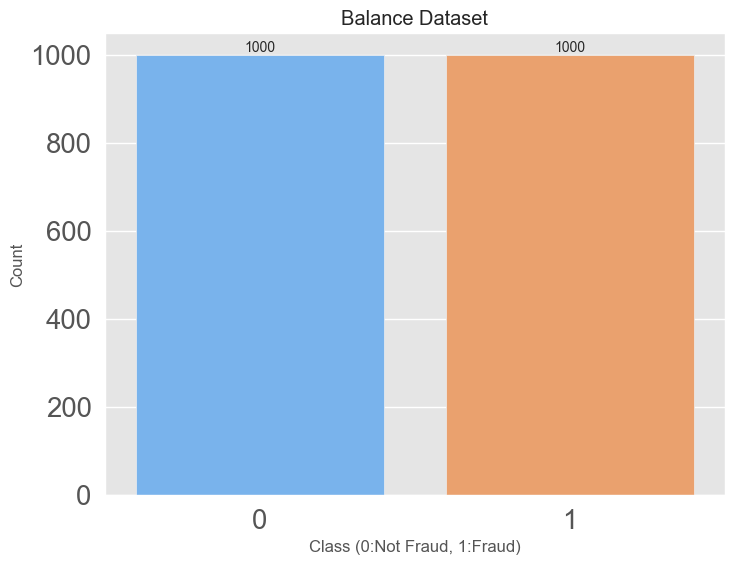

In [8]:

# Class balance
plt.style.use('ggplot')
rs = 42

fraud_cl = data[data.fraud == 1] # transactions labeled as class fraud
no_fraud_cl = data[data.fraud == 0] # transactions labeled as class NOT fraud
print("FRAUD: ", len(fraud_cl), " NOT FRAUD: ", len(no_fraud_cl))

# visualize imbalance
counts = data.fraud.value_counts()
plt.figure(figsize=(8,6))
ax = sns.barplot(x=counts.index, y = counts, palette=['#66b3ff','#ff9d59'])
plt.title('Original Dataset')
plt.ylabel('Count')
plt.xlabel('Class (0:Not Fraud, 1:Fraud)')
ax.bar_label(ax.containers[0])



# -> our dataset is imbalanced
# we don't apply simple oversampling tecniques because we would have lots of duplicated data
# SMOOTH???? -> too much artificial data
# Another reason to don't apply oversampling is that training on our machine is slow, and 1 million records are too much
# METACOST???

# SOLUTION TO BALANCE DATASET: undersampling

balanced_d = pd.concat([fraud_cl.sample(n=1000, random_state=rs), no_fraud_cl.sample(n=1000, random_state=rs)])
balanced_d = balanced_d.sample(frac=1).reset_index(drop=True)
x = balanced_d.iloc[:,:-1] # features
y = balanced_d.iloc[:,-1:] # column with target class
balanced_d.shape
display(balanced_d)

fraud_cl = balanced_d [balanced_d.fraud == 1] # transactions labeled as class fraud
no_fraud_cl = balanced_d[balanced_d.fraud == 0] # transactions labeled as class NOT fraud
print("FRAUD: ", len(fraud_cl), " NOT FRAUD: ", len(no_fraud_cl))

# visualize balance
# visualize imbalance
counts = balanced_d.fraud.value_counts()
plt.figure(figsize=(8,6))
ax = sns.barplot(x=counts.index, y = counts, palette=['#66b3ff','#ff9d59'])
plt.title('Balance Dataset')
plt.ylabel('Count')
plt.xlabel('Class (0:Not Fraud, 1:Fraud)')
ax.bar_label(ax.containers[0])




In [9]:
X = x # X = x.drop(x.index[1000:]) # data with features withoud column "fraud"
display(X)
Y = y # Y = y.drop(y.index[1000:]) #Y = y # column "fraud"
display(Y)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,0.001153,0.017954,0.000951,1,0,0,1
1,0.000594,0.000066,0.035166,1,1,0,1
2,0.006026,0.000010,0.015145,1,0,0,1
3,0.004789,0.000011,0.000739,1,0,1,0
4,0.009579,0.000041,0.001107,1,1,0,0
...,...,...,...,...,...,...,...
1995,0.000594,0.000009,0.005476,1,0,0,0
1996,0.009674,0.000318,0.009142,1,0,0,1
1997,0.002401,0.000003,0.000888,1,1,0,1
1998,0.005466,0.004888,0.014515,1,0,0,1


,fraud
0,1
1,1
2,1
3,0
4,0
...,...
1995,0
1996,1
1997,0
1998,1


array([[-19.876467 ,   5.0718665],
       [ -5.6537814, -53.192947 ],
       [ 21.03263  ,   0.8680897],
       ...,
       [-29.437387 ,  -7.086928 ],
       [ 17.903341 ,   4.3944488],
       [ 10.255507 , -20.504223 ]], dtype=float32)

array([ -0.65700525, -69.854744  ,  18.22759   ,  27.442175  ,
        36.914078  , -13.98116   , -32.740795  , -11.058014  ,
       -32.971878  , -20.331356  ,  -3.0956743 ,  14.2757    ,
        35.923958  ,  23.931778  , -63.62521   , -46.020737  ,
       -12.109368  ,  -1.072093  ,  18.062     , -31.66446   ,
       -27.418507  , -12.448078  ,  23.94839   ,  -8.726788  ,
       -51.360706  , -21.629526  ,  24.676323  , -24.02269   ,
       -67.11002   , -63.874374  , -63.92347   ,  27.765326  ,
       -32.50221   ,  -7.092103  , -11.930438  ,  25.398247  ,
       -15.906852  ,  33.05399   , -32.214886  , -31.0243    ,
        -9.004522  ,  -0.5465791 ,  13.097453  , -31.552158  ,
        -7.5911317 , -66.296425  , -45.54578   , -33.000885  ,
       -32.943935  , -15.541605  , -24.831524  , -33.148647  ,
       -27.324003  ,  -4.668241  , -61.679405  , -27.912125  ,
        20.263735  ,  -5.1907997 , -63.247086  , -30.72778   ,
         1.1080704 , -30.737879  , -66.69025   , -57.43

array([ 61.409454  ,  -8.57968   ,  43.916992  ,  39.684975  ,
        46.53656   ,  26.233847  ,  -8.590074  ,  21.677591  ,
        -7.233795  ,  19.459532  ,  25.685902  , -45.22049   ,
       -34.13036   ,  46.973564  , -10.850843  ,  -7.9720354 ,
        17.522676  ,  61.05953   ,  48.81426   , -18.715363  ,
       -24.642796  ,  24.925962  ,  43.877415  ,  26.955544  ,
        19.47736   , -15.87594   ,  48.70306   , -14.544691  ,
        -4.196908  ,  -9.646039  ,  -9.251355  ,  49.340588  ,
       -11.137193  ,  26.750639  , -39.17683   ,  42.70475   ,
        52.72355   ,  43.48218   ,  -4.982571  , -17.027758  ,
        16.402704  ,  62.094753  , -43.10351   ,  -5.818478  ,
        26.78694   ,  -6.084811  ,  -7.5248976 , -16.395962  ,
       -12.800109  ,  52.538544  , -14.961744  , -12.854747  ,
       -26.047129  ,  26.510267  ,   6.5279117 , -27.71804   ,
         5.9409494 ,  19.893147  , -11.623761  ,  -7.743753  ,
        24.716078  , -22.178846  , -15.962718  ,  -0.29

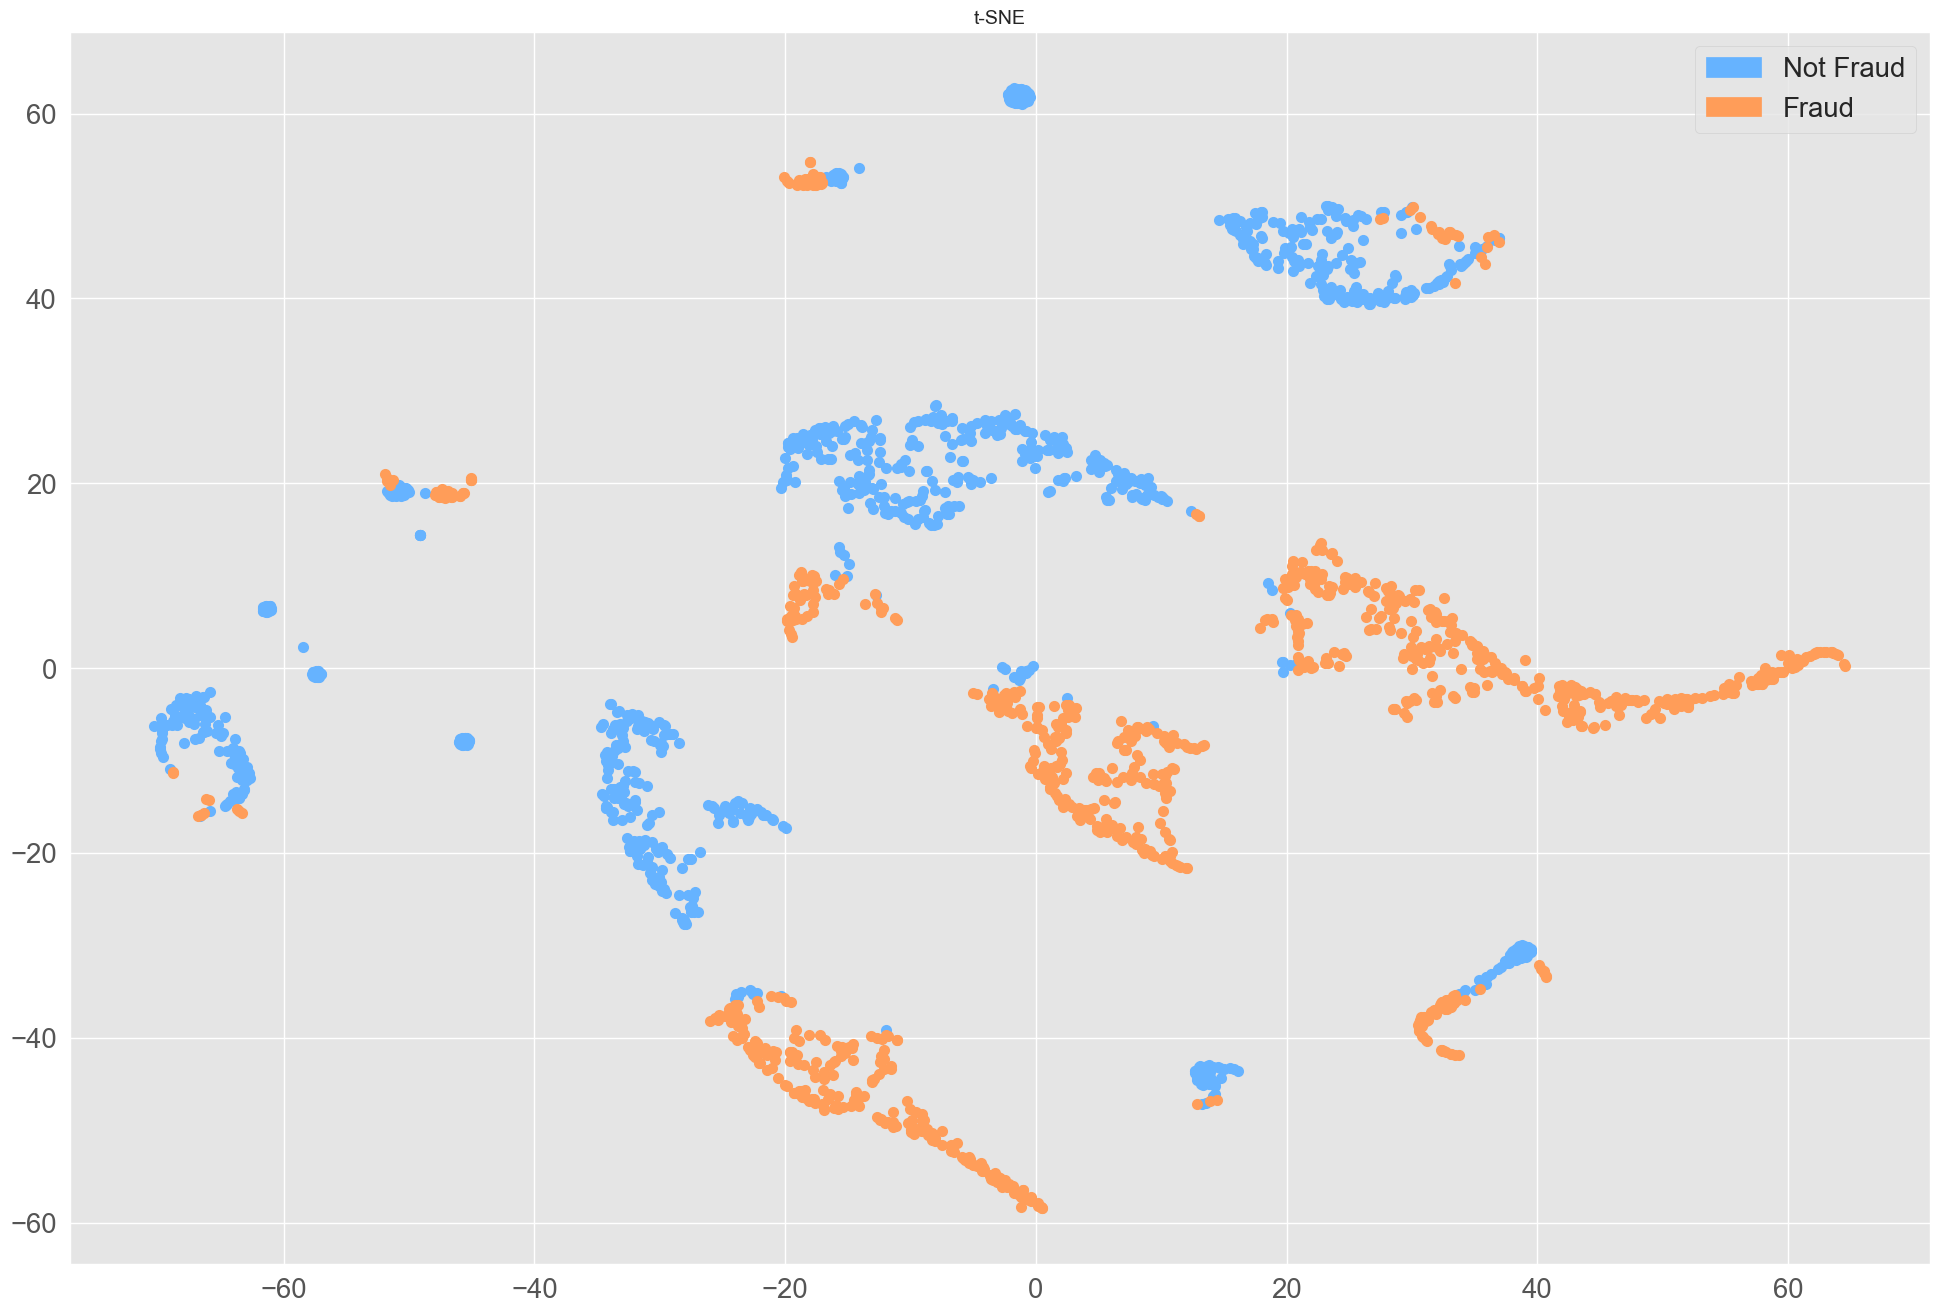

In [10]:
"""  
Visualizing our classes would prove to be quite interesting and 
show us if they are clearly separable. However, it is not possible 
to produce a 30-dimensional plot using all of our predictors. Instead, 
using a dimensionality reduction technique such as t-SNE, we are able to project 
these higher dimensional distributions into lower-dimensional visualizations. 
"""

from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

# blu -> select positions as y = 0
# blu_index = Y.index[Y['fraud'== 0]]

blu_index = list(np.where(Y["fraud"] == 0)[0])
orange_index = list(np.where(Y["fraud"] == 1)[0])

# print(blu_index)
# print(orange_index)

# t-sne: dimensionality reduction to visualize points
# X = x # data with features withoud column "fraud"
#y = y # column "fraud"

# t-sne
X_reduced_tsne = TSNE(n_components=2, random_state=rs).fit_transform(X.values)

display(X_reduced_tsne)
display(X_reduced_tsne[blu_index,0])
display(X_reduced_tsne[blu_index,1])

# t-SNE scatter plot
f, ax = plt.subplots(figsize=(24,16))

blue_patch = mpatches.Patch(color='#66b3ff', label='Not Fraud')
red_patch = mpatches.Patch(color='#ff9d59', label='Fraud')

# ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], color='#66b3ff', label='Not Fraud', linewidths=2) # lisa
ax.scatter(X_reduced_tsne[blu_index,0], X_reduced_tsne[blu_index,1], color='#66b3ff', label='Not Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[orange_index,0], X_reduced_tsne[orange_index,1], color='#ff9d59', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

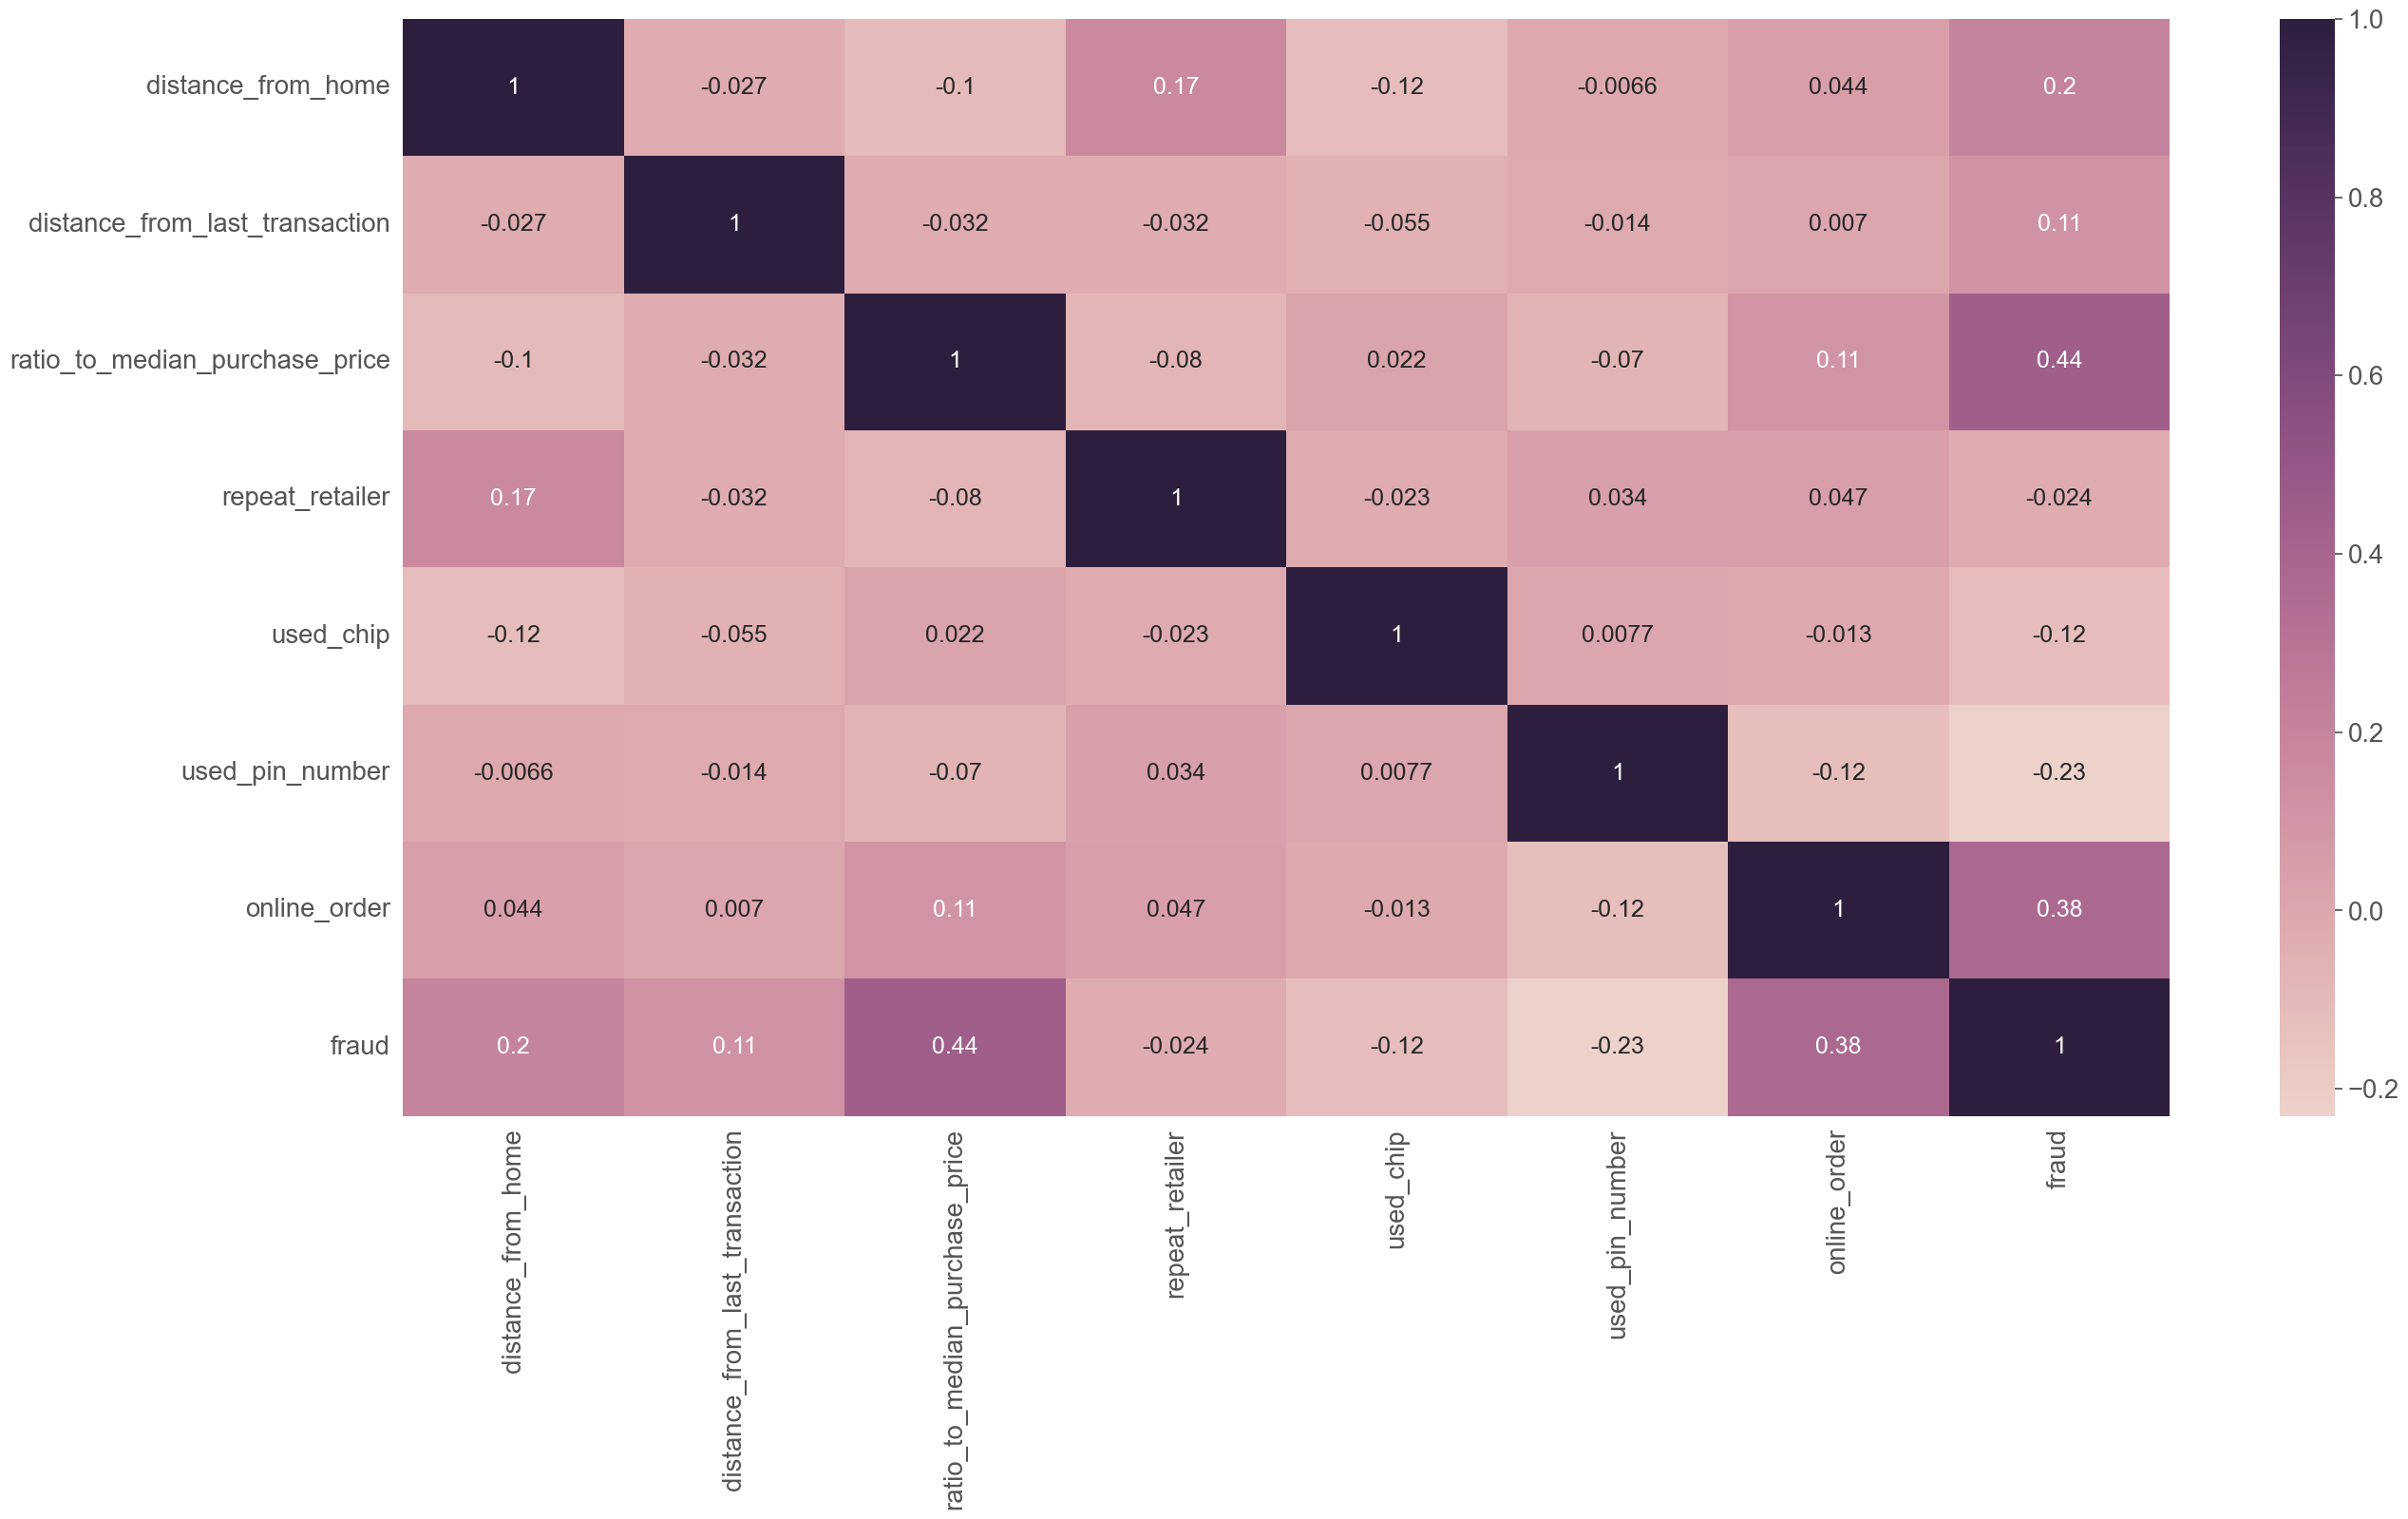

In [11]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(balanced_d[balanced_d.columns].corr(),cmap=sns.cubehelix_palette(as_cmap=True),annot=True,annot_kws={"size": 18})

# we show again correlation matrix with balanced data 
# -> NOT same values of correlation as with imbalanced data
# balancing data highlights some correlations: online_order/fraud (+), fraud/use_pin (-)
# in general values are a little bit bigger than before
# -> we don't drop any feature beacuse there aren't feature too much correlated

# Classification

In [12]:
x = balanced_d.iloc[:,:-1] # features
y = balanced_d.iloc[:,-1:] # column with target class
balanced_d.shape
display(balanced_d)
display(x)
display(y)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.001153,0.017954,0.000951,1,0,0,1,1
1,0.000594,0.000066,0.035166,1,1,0,1,1
2,0.006026,0.000010,0.015145,1,0,0,1,1
3,0.004789,0.000011,0.000739,1,0,1,0,0
4,0.009579,0.000041,0.001107,1,1,0,0,0
...,...,...,...,...,...,...,...,...
1995,0.000594,0.000009,0.005476,1,0,0,0,0
1996,0.009674,0.000318,0.009142,1,0,0,1,1
1997,0.002401,0.000003,0.000888,1,1,0,1,0
1998,0.005466,0.004888,0.014515,1,0,0,1,1


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,0.001153,0.017954,0.000951,1,0,0,1
1,0.000594,0.000066,0.035166,1,1,0,1
2,0.006026,0.000010,0.015145,1,0,0,1
3,0.004789,0.000011,0.000739,1,0,1,0
4,0.009579,0.000041,0.001107,1,1,0,0
...,...,...,...,...,...,...,...
1995,0.000594,0.000009,0.005476,1,0,0,0
1996,0.009674,0.000318,0.009142,1,0,0,1
1997,0.002401,0.000003,0.000888,1,1,0,1
1998,0.005466,0.004888,0.014515,1,0,0,1


,fraud
0,1
1,1
2,1
3,0
4,0
...,...
1995,0
1996,1
1997,0
1998,1


In [13]:
# Random state


# x = data.iloc[:,:-1] # dataframe with features
# y = data.iloc[:,-1:] # columns with target class


# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 7)
(400, 7)
(1600, 1)
(400, 1)


In [22]:
# List of classifiers:
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(), # n_neighbors=1 -> accuracy 100%, n_neighbors=100 -> accuracy 99%, n_neighbors=1000 -> accuracy 94%
    LogisticRegression(random_state = rs), 
    DecisionTreeClassifier(random_state=rs), # max_depth=1 -> accuracy 84%, # max_depth=2 -> accuracy 92% max_depth=3 -> accuracy 97%
    # SVC(probability=False, gamma='scale', random_state=rs), # SVC(probability=True) -> Accuracy: 0.93 	 ---> SVC 
    RandomForestClassifier(n_estimators = 10, random_state=rs), # max_depth=2 -> accuracty 0.96 max_depth=1 -> accuracty 0.94 max_depth=3 -> accuracty 0.97 max_depth=4 accuracty 0.99 max_depth=5 accuracty 1.0
    LinearSVC(random_state=rs), # works better for large training set
    SGDClassifier(random_state=rs),
    LinearDiscriminantAnalysis()
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) # resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimize

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

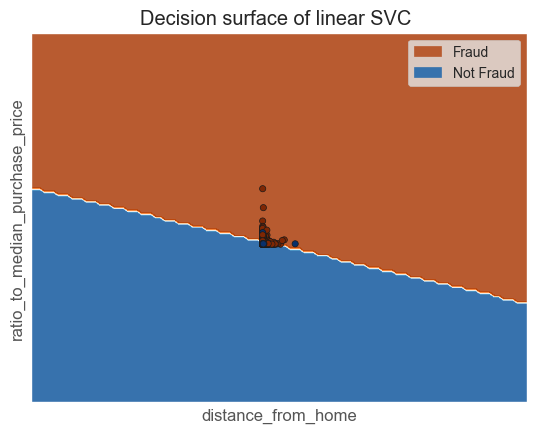

In [15]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn import svm
import matplotlib.patches as mpatches
# try to understand linear svc using two features: distance from home and ratio


# Select 2 features / variable for the 2D plot that we are going to create.
X = x_train[["distance_from_home", "ratio_to_median_purchase_price"]]  # we only take the first two features.
y = y_train

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = LinearSVC(random_state=rs)
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X["distance_from_home"], X["ratio_to_median_purchase_price"]
xx, yy = make_meshgrid(X0, X1)


# define top and bottom colormaps 
bottom = cm.get_cmap('Oranges', 128) # r means reversed version
top = cm.get_cmap('Blues_r', 128)# combine it all
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))# create a new colormaps with a name of OrangeBlue
blue_orange = ListedColormap(newcolors, name='OrangeBlue')

# plt.figure(figsize=(7, 6))
# plt.pcolormesh(data, cmap = orange_blue)
# plt.colorbar()


# plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plot_contours(ax, clf, xx, yy, cmap=blue_orange # Paired
                     , alpha=0.8)
# ax.scatter(X0, X1, c=[y],  cmap=plt.cm.coolwarm, s=20, edgecolors='k')

ax.scatter(X0, X1, c=[y],  cmap=blue_orange, s=20, edgecolors='k')  # Paired
ax.set_ylabel("ratio_to_median_purchase_price")
ax.set_xlabel('distance_from_home')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

# ax.legend()
blue_patch = mpatches.Patch(color='#3772ad', label='Not Fraud')
red_patch = mpatches.Patch(color='#b85b30', label='Fraud')
plt.rc('legend',fontsize='medium') # using a named size
ax.legend(handles=[red_patch, blue_patch])
plt.show()

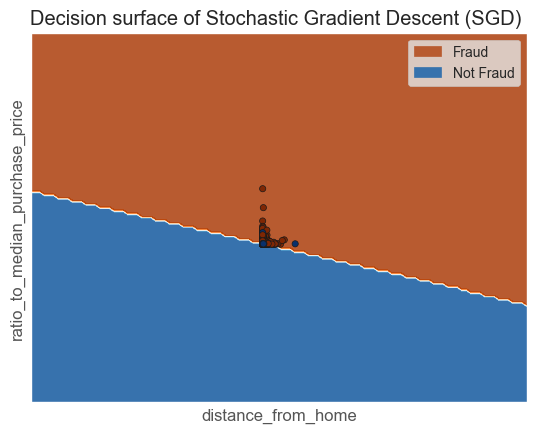

In [16]:

# try to understand linear sgd using two features: distance from home and ratio


# Select 2 features / variable for the 2D plot that we are going to create.
X = x_train[["distance_from_home", "ratio_to_median_purchase_price"]]  # we only take the first two features.
y = y_train

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = SGDClassifier(random_state=rs)
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Stochastic Gradient Descent (SGD) ')
# Set-up grid for plotting.
X0, X1 = X["distance_from_home"], X["ratio_to_median_purchase_price"]
xx, yy = make_meshgrid(X0, X1)


# define top and bottom colormaps 
bottom = cm.get_cmap('Oranges', 128) # r means reversed version
top = cm.get_cmap('Blues_r', 128)# combine it all
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))# create a new colormaps with a name of OrangeBlue
blue_orange = ListedColormap(newcolors, name='OrangeBlue')

# plt.figure(figsize=(7, 6))
# plt.pcolormesh(data, cmap = orange_blue)
# plt.colorbar()


# plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plot_contours(ax, clf, xx, yy, cmap=blue_orange # Paired
                     , alpha=0.8)
# ax.scatter(X0, X1, c=[y],  cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.scatter(X0, X1, c=[y],  cmap=blue_orange, s=20, edgecolors='k')  # Paired
ax.set_ylabel("ratio_to_median_purchase_price")
ax.set_xlabel('distance_from_home')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
# ax.legend()
blue_patch = mpatches.Patch(color='#3772ad', label='Not Fraud')
red_patch = mpatches.Patch(color='#b85b30', label='Fraud')
plt.rc('legend',fontsize='medium') # using a named size
ax.legend(handles=[red_patch, blue_patch])
plt.show()

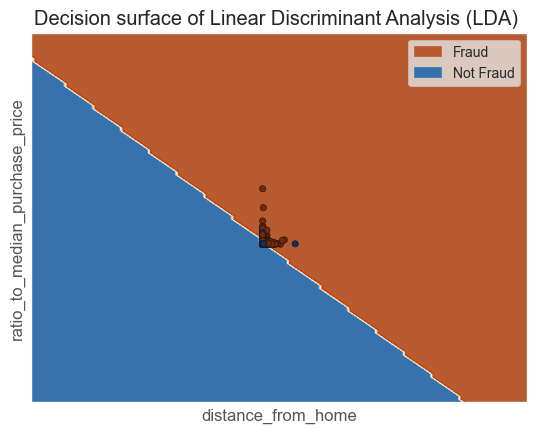

In [17]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn import svm
# try to understand linear sgd using two features: distance from home and ratio


# Select 2 features / variable for the 2D plot that we are going to create.
X = x_train[["distance_from_home", "ratio_to_median_purchase_price"]]  # we only take the first two features.
y = y_train

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = LinearDiscriminantAnalysis()
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Linear Discriminant Analysis (LDA) ')
# Set-up grid for plotting.
X0, X1 = X["distance_from_home"], X["ratio_to_median_purchase_price"]
xx, yy = make_meshgrid(X0, X1)


# define top and bottom colormaps 
bottom = cm.get_cmap('Oranges', 128) # r means reversed version
top = cm.get_cmap('Blues_r', 128)# combine it all
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))# create a new colormaps with a name of OrangeBlue
blue_orange = ListedColormap(newcolors, name='OrangeBlue')

# plt.figure(figsize=(7, 6))
# plt.pcolormesh(data, cmap = orange_blue)
# plt.colorbar()


# plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plot_contours(ax, clf, xx, yy, cmap=blue_orange # Paired
                     , alpha=0.8)
# ax.scatter(X0, X1, c=[y],  cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.scatter(X0, X1, c=[y],  cmap=blue_orange, s=20, edgecolors='k')  # Paired
ax.set_ylabel("ratio_to_median_purchase_price")
ax.set_xlabel('distance_from_home')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
# ax.legend()
blue_patch = mpatches.Patch(color='#3772ad', label='Not Fraud')
red_patch = mpatches.Patch(color='#b85b30', label='Fraud')
plt.rc('legend',fontsize='medium') # using a named size
ax.legend(handles=[red_patch, blue_patch])
plt.show()

Accuracy: 0.98 	 ---> KNeighborsClassifier 
Accuracy: 0.69 	 ---> LogisticRegression 
Accuracy: 0.99 	 ---> DecisionTreeClassifier 
Accuracy: 0.99 	 ---> RandomForestClassifier 
Accuracy: 0.8 	 ---> LinearSVC 
Accuracy: 0.79 	 ---> SGDClassifier 
Accuracy: 0.93 	 ---> LinearDiscriminantAnalysis 


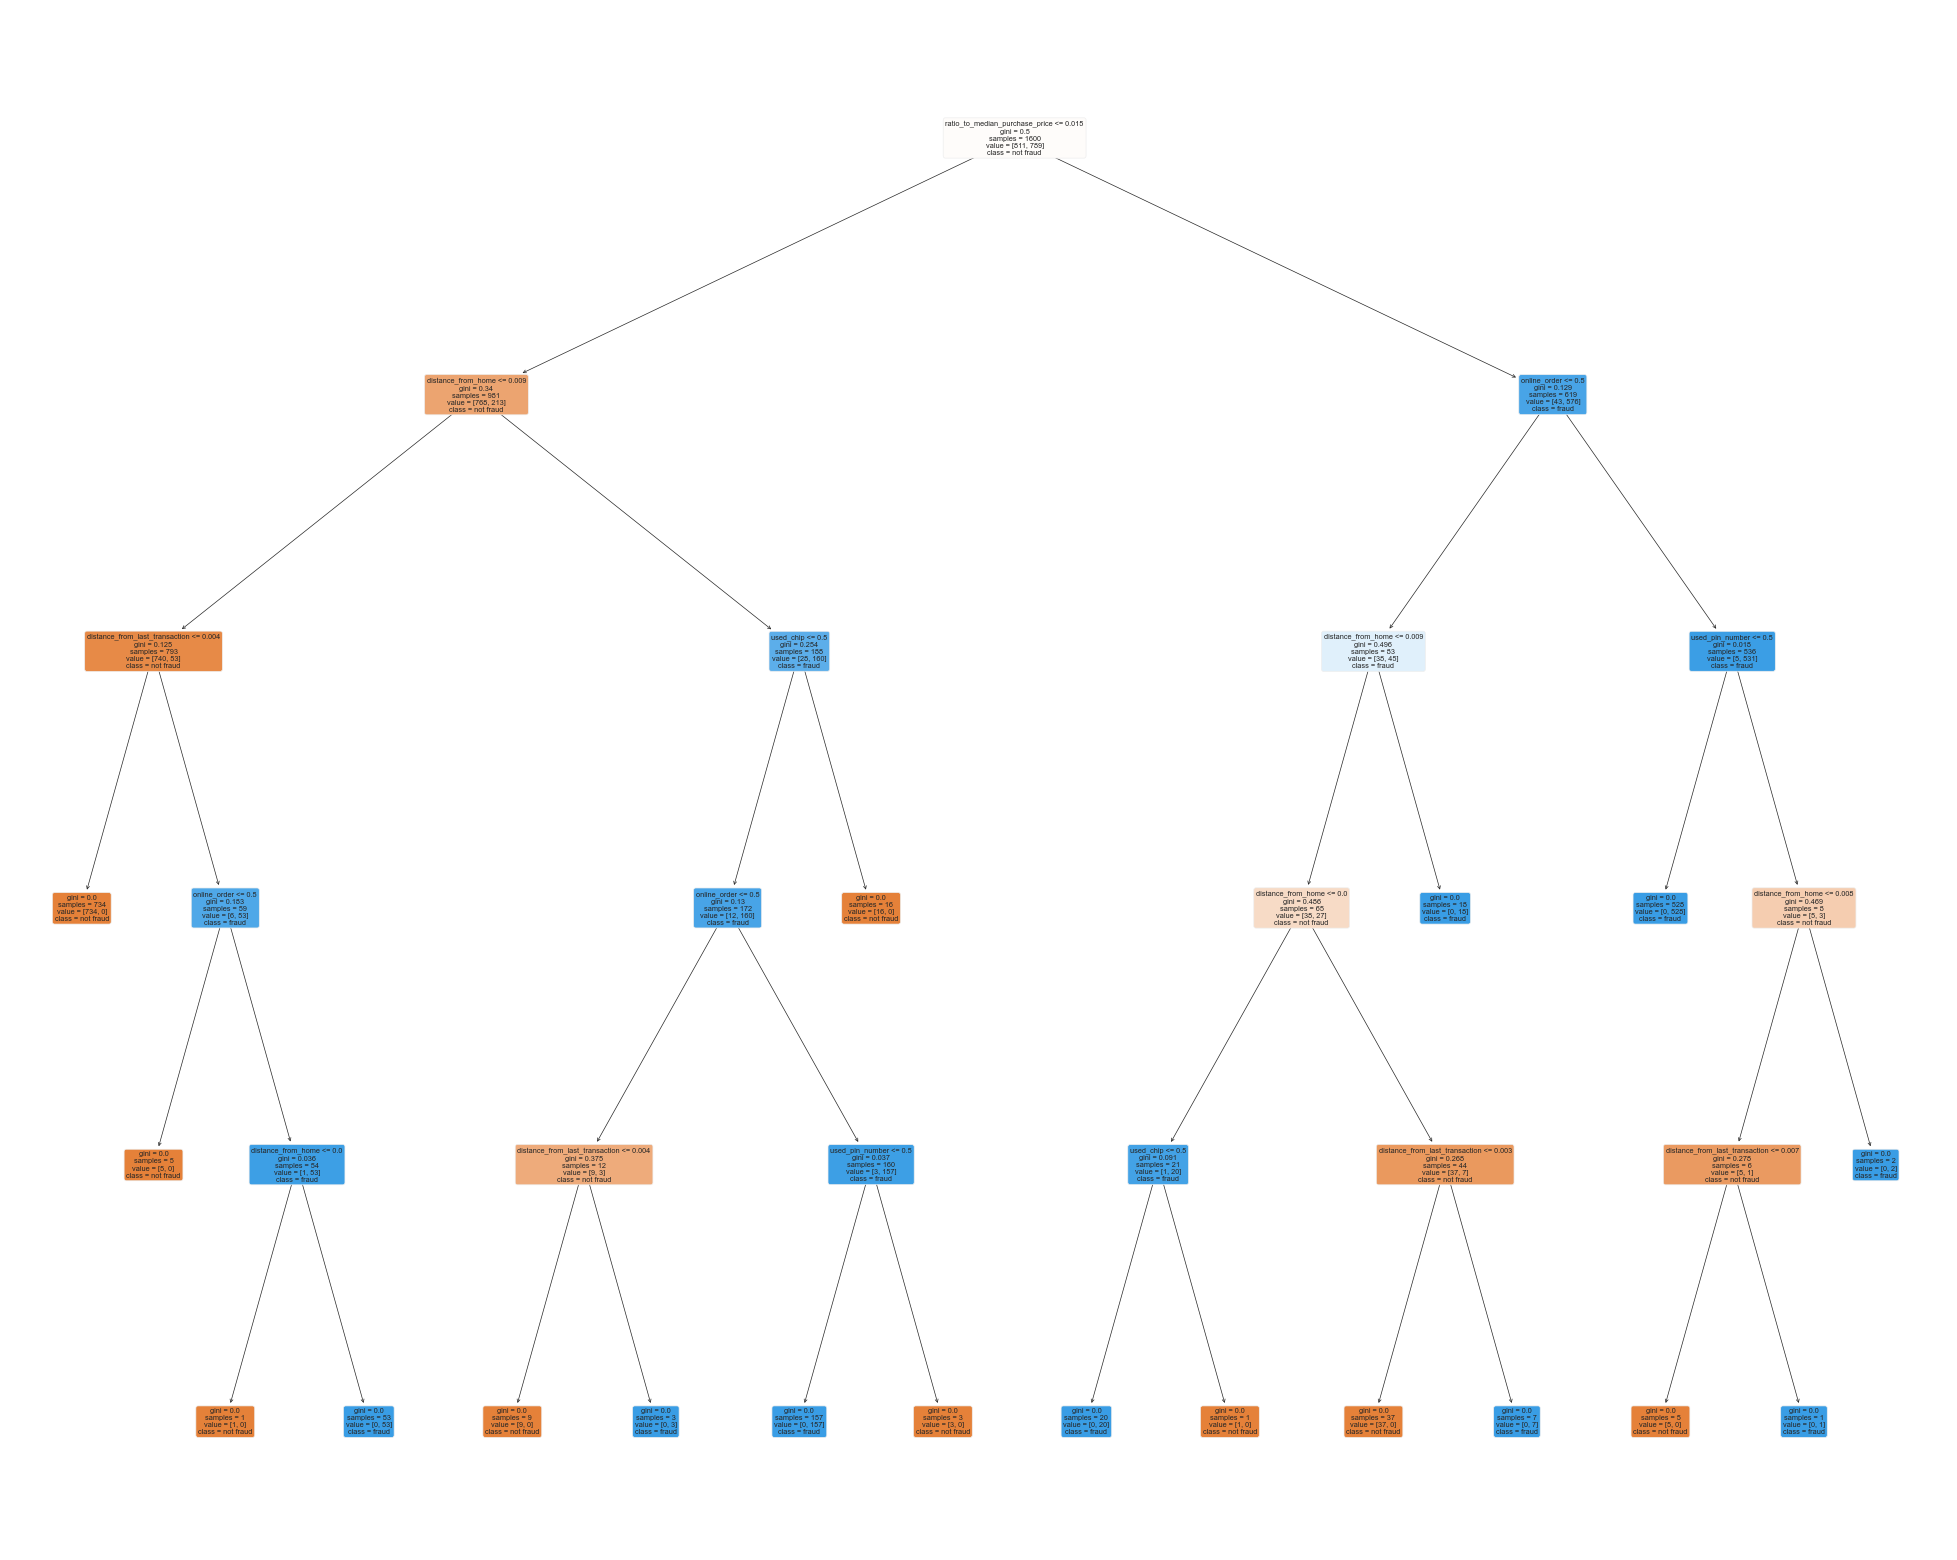

In [23]:
from sklearn import tree
from graphviz import Source
from IPython.display import SVG
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import svm
from sklearn.decomposition import PCA


# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train, scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test, y_pred), 2) #need to maximize
    # train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')

    # for decision tree
    if name == "DecisionTreeClassifier":
        
        # text_representation = tree.export_text(clf)
        # print(text_representation)
        fig = plt.figure(figsize=(25,20))
        _ = tree.plot_tree(clf, 
                   feature_names=["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price","repeat_retailer","used_chip","used_pin_number","online_order"],  
                    class_names=["not fraud", "fraud"],  # True 
                   filled=True,
                   rounded=True)
        


    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test, y_pred))
    clr.append(classification_report(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())



# AFTER 293 MINUTES
# Accuracy: 0.94 	 ---> LogisticRegression 
# Accuracy: 1.0 	 ---> DecisionTreeClassifier 
# Accuracy: 0.93 	 ---> SVC 
# Accuracy: 1.0 	 ---> RandomForestClassifier 


# IT'S DIFFICULT TO HANDLE TRAINING OF 1 MILLION RECORDS ON OUR MACHINES
# -> UNDERSAMPLING TO BALANCE (NOT OVERSAMPLING)

3.9.13 (main, May 24 2022, 21:28:31) 
[Clang 13.1.6 (clang-1316.0.21.2)]


   CrossValMeans  CrossValerrors               Algorithm
0       0.996846        0.000368    KNeighborsClassifier
1       0.897464        0.001251      LogisticRegression
2       0.999914        0.000048  DecisionTreeClassifier
3       0.999893        0.000060  RandomForestClassifier
4       0.920240        0.002953               LinearSVC
5       0.740267        0.040323           SGDClassifier


Text(0.5, 1.0, 'Cross validation scores')

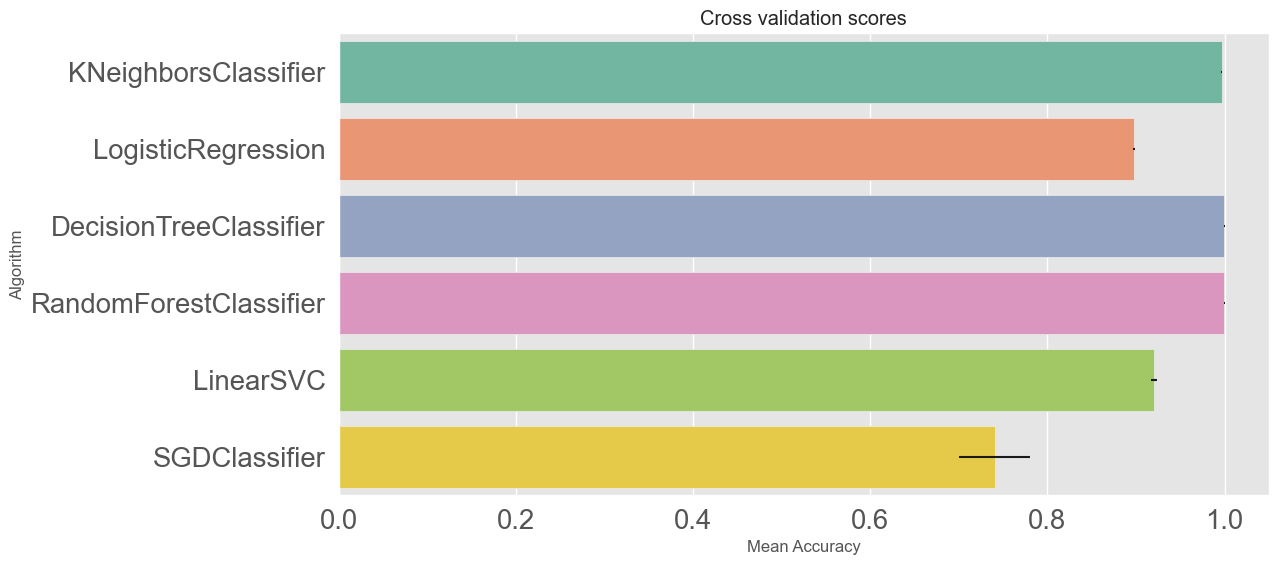

In [21]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

print(cv_res)


plt.figure(figsize=(12,6))
sns.barplot(data=cv_res, x="CrossValMeans",y="Algorithm",palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

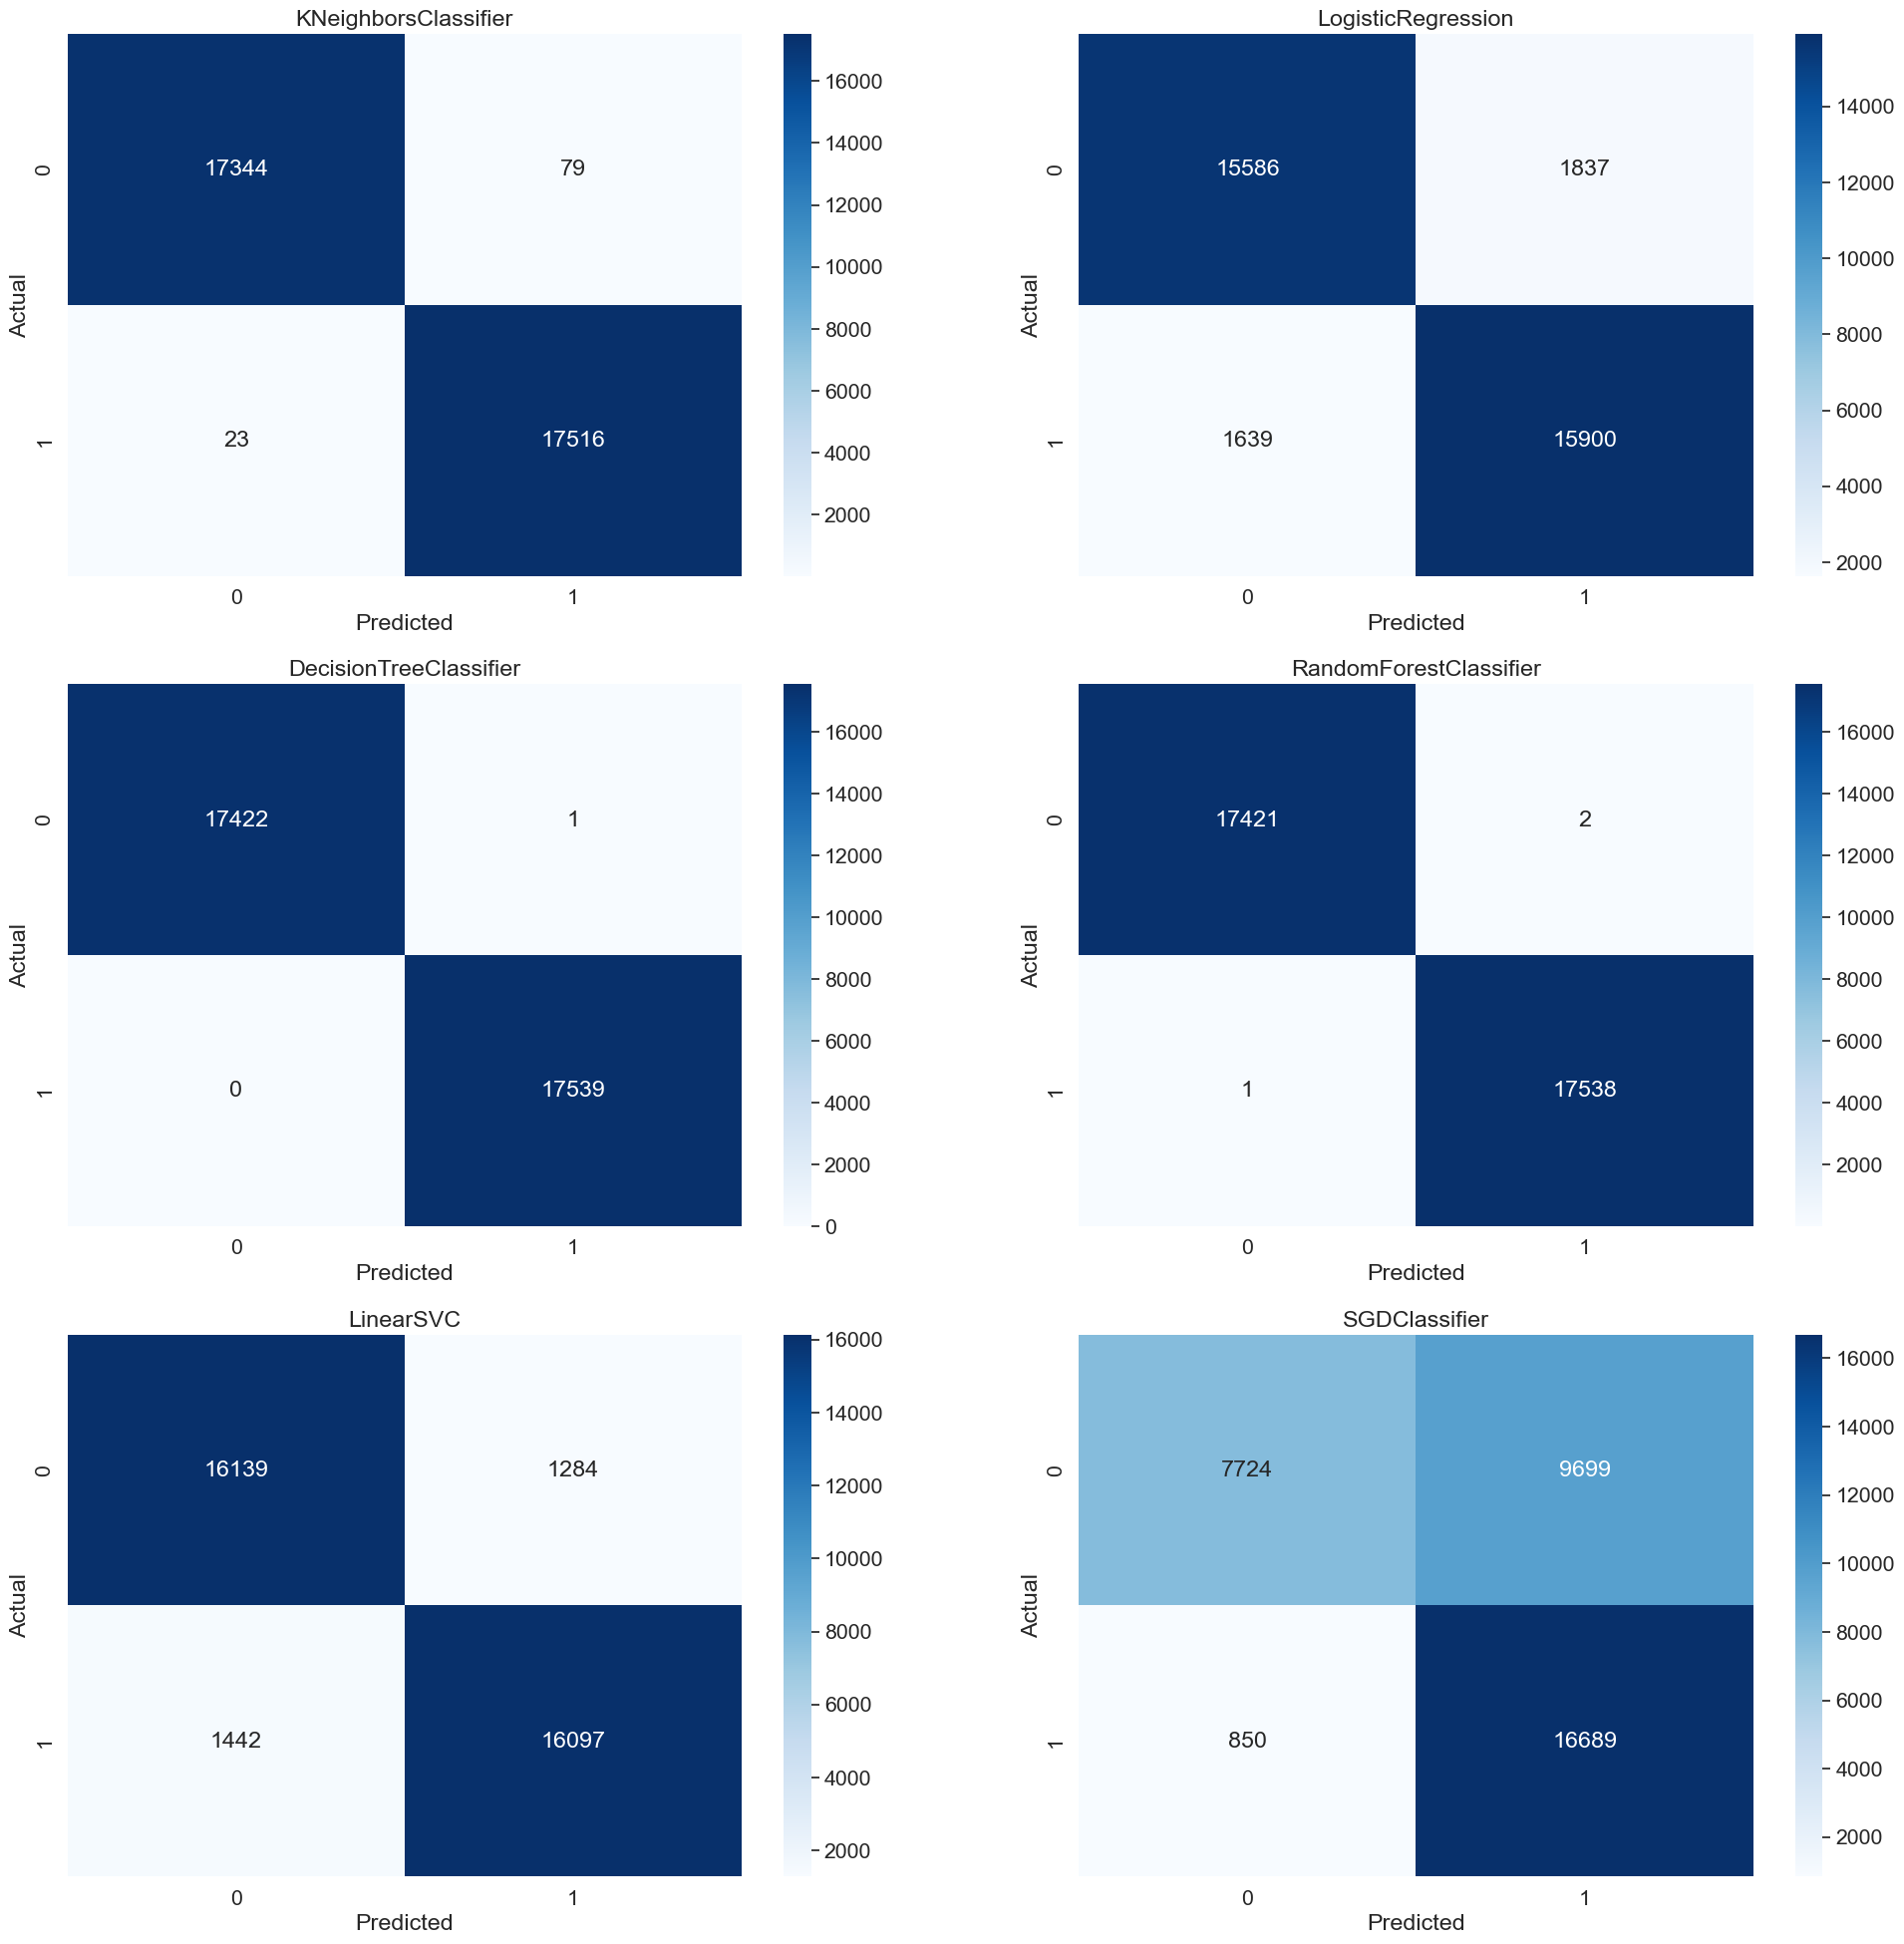

In [30]:
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(24,24))


sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,2,i+1) #adjust this acourding to the number of algorithms
    
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [31]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" );
    print (clr[i]);

KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17423
           1       1.00      1.00      1.00     17539

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     17423
           1       0.90      0.91      0.90     17539

    accuracy                           0.90     34962
   macro avg       0.90      0.90      0.90     34962
weighted avg       0.90      0.90      0.90     34962

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17423
           1       1.00      1.00      1.00     17539

    accuracy                           1.00     34

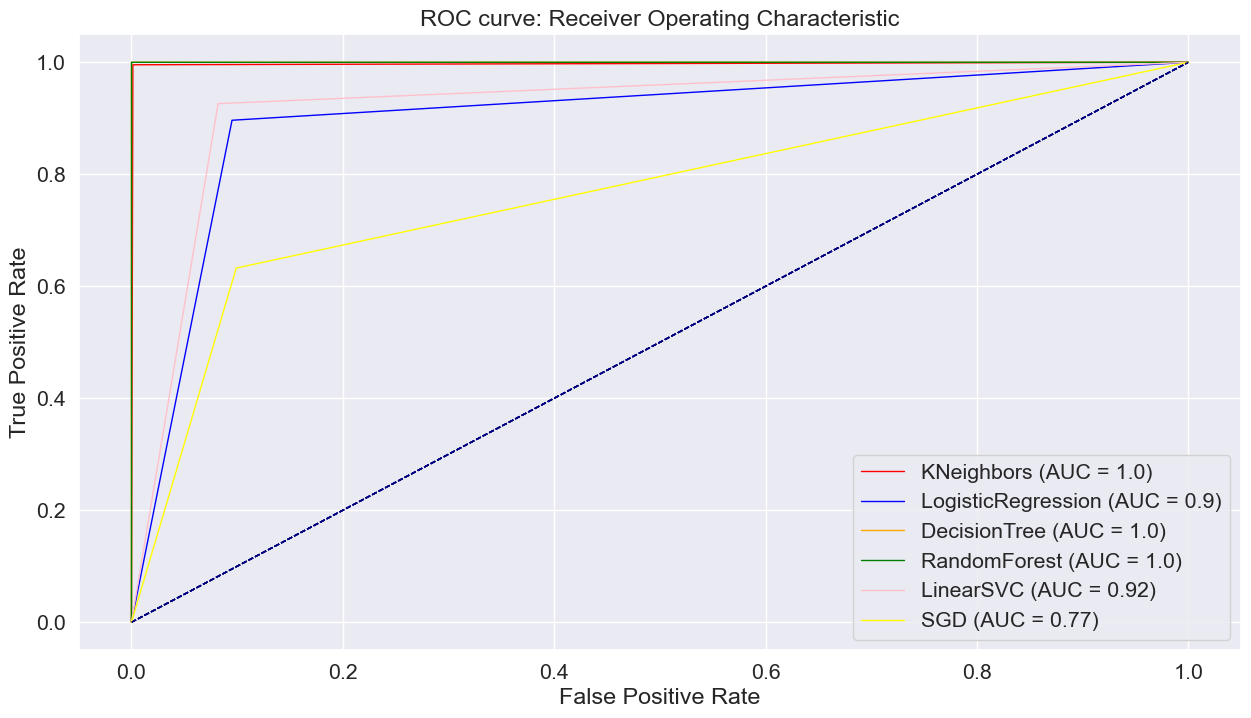

In [32]:
# ROC Curve
plt.figure(figsize=(15,8))
for i in range(len(classifiers)):
    cm = ['red', 'blue', 'orange', 'green', 'pink', 'yellow', 'lightgreen', 'black', 'purple', 'lightblue'] #add more colours for more algorithms
    plt.plot(roc_fpr[i], roc_tpr[i], c=cm[i], lw=1, label=clf_name[i].replace("Classifier", "") + " (AUC = " + str(round(roc_auc[i],2)) + ")")
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve: Receiver Operating Characteristic')
    plt.legend(loc="lower right")

In [33]:
# Search grid for optimal parameters

DT_param = {"max_depth": [1,2,3,4,5],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "criterion": ["gini"]}

RF_param = {"max_depth": [1,2,3,4,5],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "bootstrap": [False],
            "n_estimators" :[5,10],
            "criterion": ["gini"]}

#using 4 n_jobs for faster processing
DTgs = GridSearchCV(DecisionTreeClassifier(), param_grid=DT_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)
RFgs = GridSearchCV(RandomForestClassifier(), param_grid=RF_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)

models = [DTgs, RFgs]

gs_model = []
score = []

for model in models:
    model.fit(x_train, y_train)
    gs_model.append(model.best_estimator_)
    score.append(model.best_score_)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Fitting 5 folds for each of 270 candidates, totalling 1350 fits


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

In [34]:
# scores without gridsearch
print("score without GridSearchCV: ", round(cv_acc[1], 3), round(cv_acc[3], 3))
# scores with gridsearch
print("score with GridSearchCV: ", round(score[0], 3), round(score[1], 3))

score without GridSearchCV:  0.897 1.0
score with GridSearchCV:  0.991 0.998


Text(0.5, 1.0, 'Correlation between models')

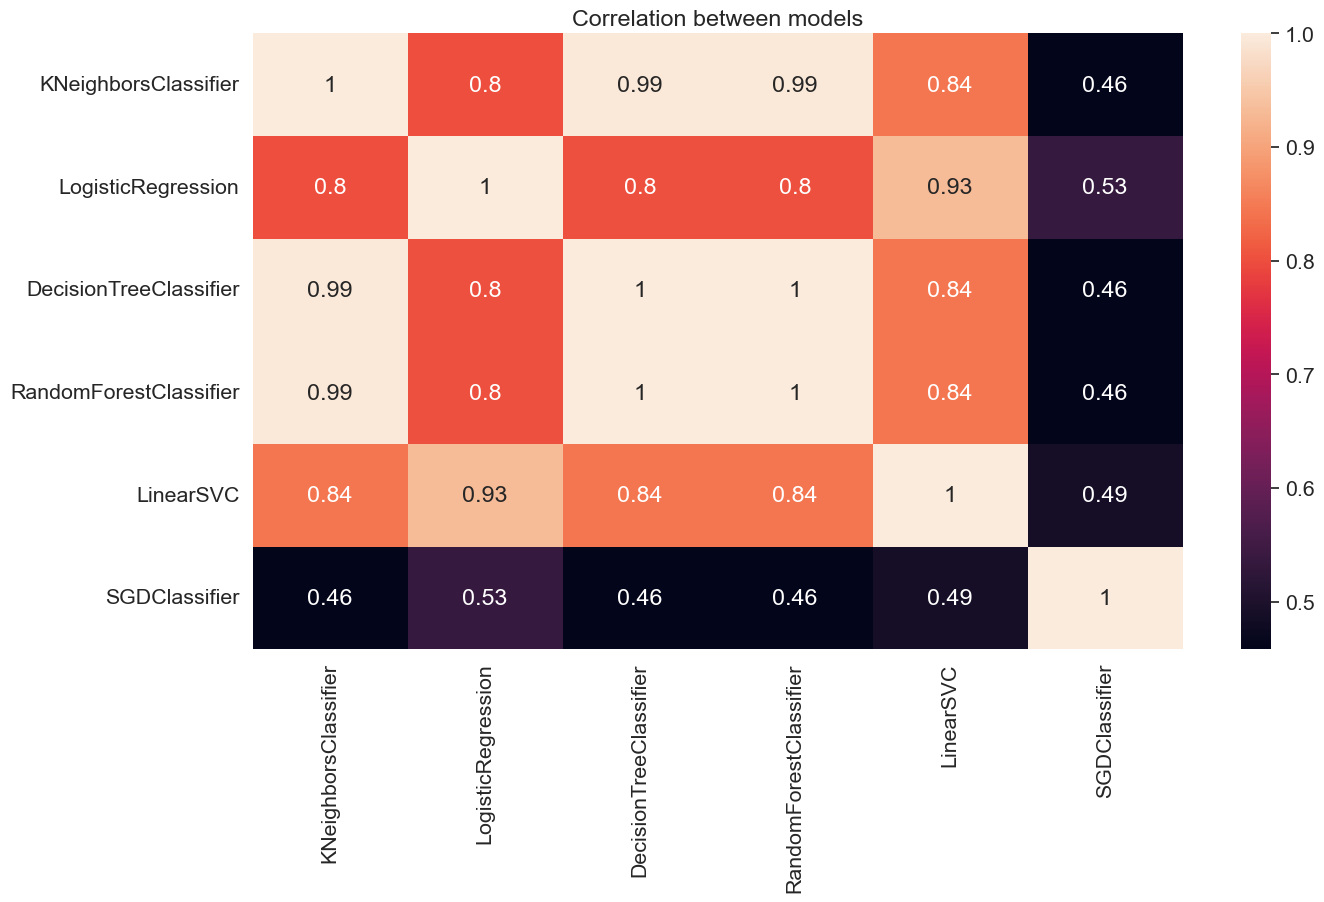

In [35]:
# Check for correlation between models: Make a correlation graph
plt.figure(figsize=(15,8))
sns.heatmap(model_results.drop("fraud", axis=1).corr(),annot=True)
plt.title("Correlation between models")

# MODEL ENSEMBLE

In [36]:
# Do model ensembling
best_model = VotingClassifier(estimators=[('dt', gs_model[0]), ('rf', gs_model[1])], 
                              voting='soft', n_jobs=4)
best_model.fit(x_train,y_train)
print(accuracy_score(y_test,best_model.predict(x_test)))

0.9901607459527487


# YELLOWBRICK

In [42]:

from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ROCAUC
from yellowbrick.model_selection import LearningCurve

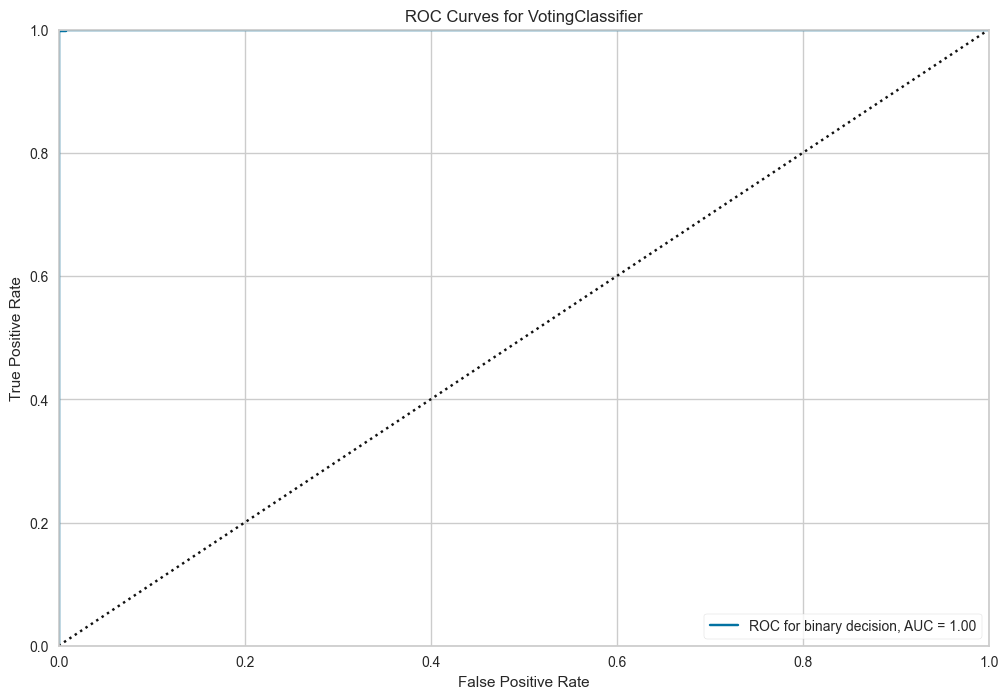

<AxesSubplot:title={'center':'ROC Curves for VotingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [44]:
# Instantiate the visualizer with the classification model


plt.figure(figsize=(12,8))
visualizer = ROCAUC(best_model, classes=[0, 1], micro=False, macro=False, binary=True)
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

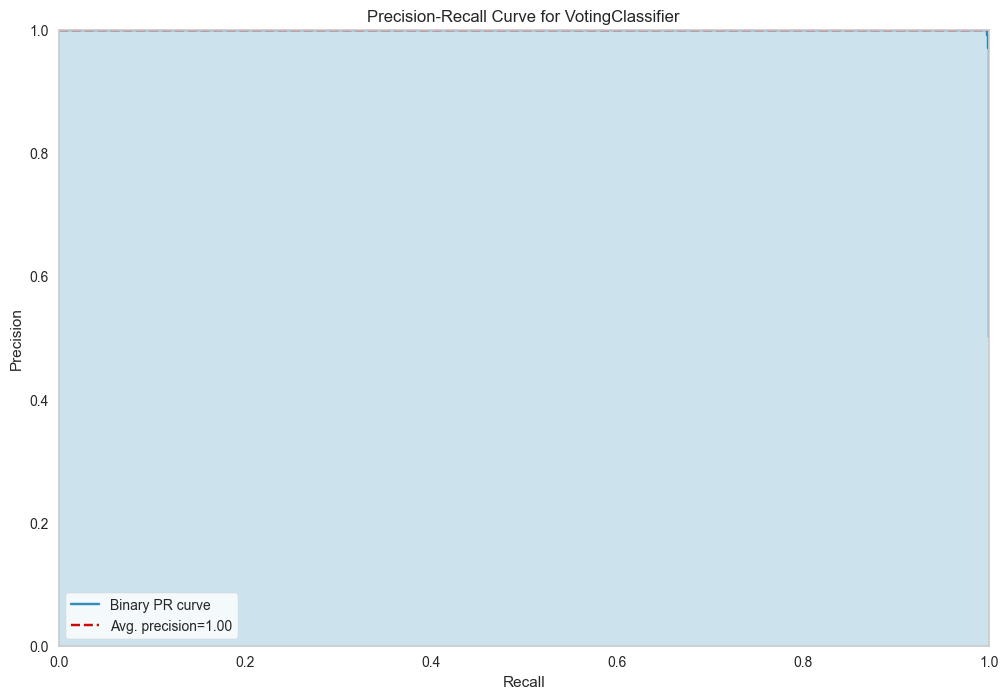

<AxesSubplot:title={'center':'Precision-Recall Curve for VotingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [45]:
plt.figure(figsize=(12,8))
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(best_model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

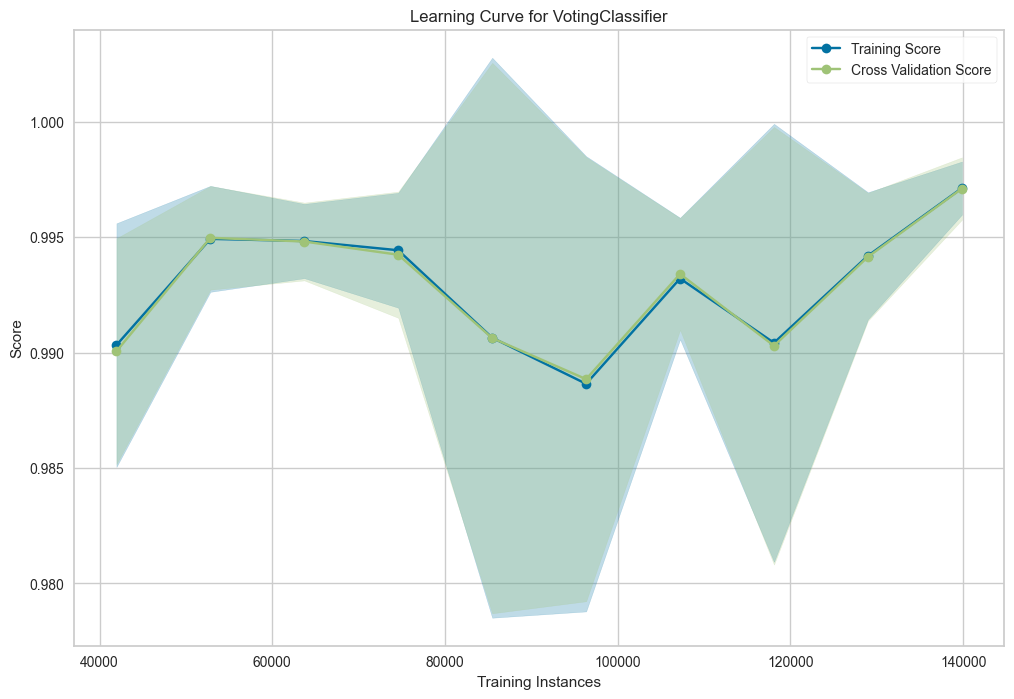

<AxesSubplot:title={'center':'Learning Curve for VotingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [46]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=5)
sizes = np.linspace(0.3, 1.0, 10)

plt.figure(figsize=(12,8))
visualizer = LearningCurve(
    best_model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(x, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure